In [76]:
import numpy as np

#return the number k of the first k significant eigenvalues
#W is the sorted vector of the eigenvalues
def entropy(W):
    F = np.ones(len(W))
    for i,w in enumerate(W):
        F[i] = (W[i]**2)/(sum(x*x for x in W))
    E = -1/np.log(len(W)) * sum(f * np.log(f) for f in F)
    f_sum = 0
    for i,f in enumerate(F):
        if f_sum > E:
            return i
        f_sum += f



In [77]:
#calcualates the distance between an approximation of x made by the rows in F and x
def calculate_distance(F,x):
    return np.dot(F @ x, F@x)

In [78]:
#predicts the labels of the samples in X to the Factormatrices in F
def predict(F,X):
    labels = []
    for x in X:
        min_dist = calculate_distance(F[0], x)
        label = 0;
        for i,f in enumerate(F):
            if (calculate_distance(f,x) < min_dist):
                min_dist = calculate_distance(f,x);
                label = i;
        labels.append(label)

    return labels

In [79]:
# F - all the F matrices resulting from SVD
# x - Samplevectors
def mainFunction(F, X):
    labels = predict(F,X)
    return labels

In [90]:
#cleanedData - Matrix of cleaned Data per Desease
import matplotlib.pyplot as plt

def calcFs(cleanedData):
    f_Matrices = []
    tmp = []
    k = []
    for dataset in cleanedData:
        c, w, f = np.linalg.svd(dataset, full_matrices=False)
        k.append(entropy(w))
        plt.scatter([range(len(w))],w)
        plt.show()
        tmp.append(f)
    for f in tmp:
        f_Matrices.append(f[0:3,:])
    return f_Matrices

In [81]:
import pandas as pd

filename = "../../HackathonMicrobiomeData/CAD/SpeciesCAD_train.csv"
data = pd.read_csv(filename)

data = data.iloc[: , 1:]
data

data2 = pd.read_csv("../../HackathonMicrobiomeData/CKD/SpeciesCKD_train.csv")
data2 = data2.iloc[:,1:]
data2

,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-005;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Blautia;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Peptococcales;Peptococcaceae;uncultured;uncultured organism,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;uncultured;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;Colidextribacter;uncultured Flavonifractor sp.,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-002;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;uncultured;uncultured bacterium.1,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;Colidextribacter;uncultured organism,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;uncultured;uncultured organism,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Frisingicoccus;uncultured bacterium,...,Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;uncultured bacterium.373,Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Rikenellaceae;Rikenellaceae RC9 gut group;uncultured bacterium.122,Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Rikenellaceae;Rikenellaceae RC9 gut group;uncultured bacterium.123,Bacteria;Firmicutes;Clostridia;Clostridia UCG-014;uncultured bacterium.505,Bacteria;Firmicutes;Clostridia;Oscillospirales;Ruminococcaceae;Subdoligranulum;Subdoligranulum variabile.11,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-005;uncultured bacterium.230,Bacteria;Firmicutes;Clostridia;Monoglobales;Monoglobaceae;Monoglobus;uncultured bacterium.204,Bacteria;Proteobacteria;Gammaproteobacteria;Aeromonadales;Succinivibrionaceae;Succinivibrio;uncultured bacterium.64,Bacteria;Proteobacteria;Gammaproteobacteria;Aeromonadales;Succinivibrionaceae;Succinivibrio;uncultured bacterium.65,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
555,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
557,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0


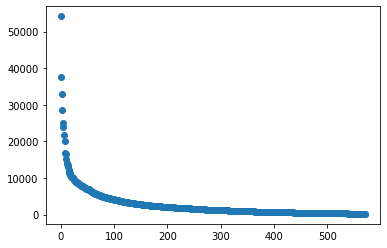

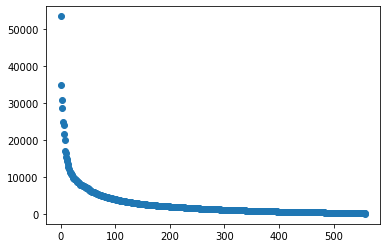

In [82]:
dataSets = [data,data2]
Fs = calcFs(dataSets)

In [83]:
print(Fs[0].shape)
print(Fs[1].shape)

(5, 12428)
(5, 12295)


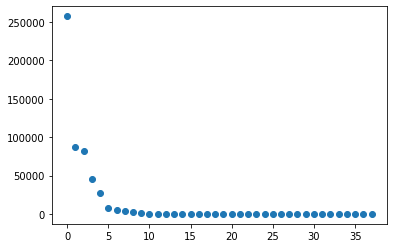

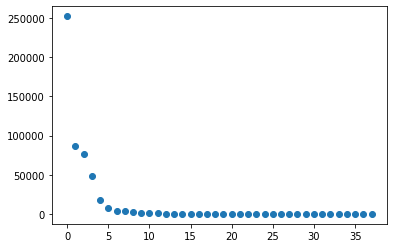

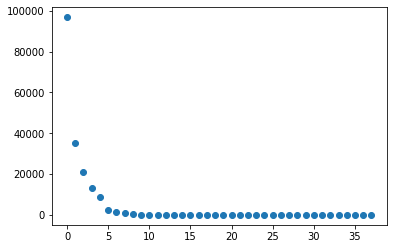

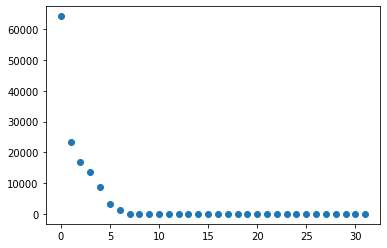

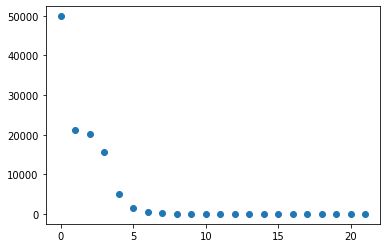

[3, 3, 4, 4, 3, 2, 4, 3, 3, 2, 3, 3, 2, 1, 3, 3, 3, 2, 3, 3, 0, 2, 2, 2, 3, 3, 3, 1, 3, 4, 3, 3, 2, 4, 3, 3, 3, 4, 3, 4, 2, 0, 4, 4, 4, 3, 3, 4, 3, 1, 4, 2, 3, 3, 4, 0, 3, 3, 3, 3, 3, 0, 4, 3, 4, 4, 4, 4, 3, 4, 3, 4, 0, 3, 2, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 3, 4, 3, 4, 1, 4, 3, 3, 3, 4, 3, 3, 3, 0, 3, 4, 3, 3, 3, 3, 2, 3]
[3, 3, 3, 3, 2, 4, 3, 0, 2, 3, 3, 3, 3, 4, 2, 3, 3, 4, 2, 3, 3, 3, 4, 2, 3, 3, 3, 3, 4, 4, 0, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 0, 3, 3, 3, 4, 4, 3, 4, 1, 3, 3, 0, 4, 4, 3, 4, 4, 3, 3, 4, 0, 4, 4, 2, 3, 1, 3, 4, 3, 4, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 0, 4, 3, 4, 3, 1, 4, 4, 3, 4, 4, 3, 0, 4, 3, 3, 3, 3, 3]
[4, 4, 3, 2, 1, 2, 3, 4, 4, 3, 3, 3, 3, 2, 3, 0, 4]
[4, 3, 4, 4, 4, 4, 3, 3, 4]
[4, 2, 3, 3, 2, 4]


In [106]:
import sklearn.model_selection as ms
#run SVD and evaluate
path = "../unionMatrix_Class.csv"
data = pd.read_csv(path)
data = data.iloc[:,1:]
all_data = []
all_data.append(data[data["label"] == 0])
all_data.append(data[data["label"] == 1])
all_data.append(data[data["label"] == 2])
all_data.append(data[data["label"] == 3])
all_data.append(data[data["label"] == 4])
train= []
test = []
true = []
for dat in all_data:
    X_train, X_test, Y_train, Y_test = ms.train_test_split(dat.iloc[:,0:-1], dat.iloc[:,-1],test_size=0.2, shuffle=True)
    train.append(X_train)
    test.append(X_test)
    true = true + list(Y_test)

F = calcFs(train)
predicted = []
for i in range(len(test)):
    predicted = predicted + list(mainFunction(F,test[i].values))
    print(mainFunction(F,test[i].values))


In [107]:
import sklearn.metrics
sklearn.metrics.confusion_matrix(true,predicted)

array([[ 6,  5, 14, 68, 32],
       [ 7,  3,  6, 55, 33],
       [ 1,  1,  3,  7,  5],
       [ 0,  0,  0,  3,  6],
       [ 0,  0,  2,  2,  2]], dtype=int64)

In [108]:
import sklearn.metrics
sklearn.metrics.matthews_corrcoef(true,predicted)

-0.00848302367240745

In [24]:
true

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,


In [25]:
predicted

[4,
 0,
 0,
 0,
 3,
 0,
 4,
 4,
 0,
 0,
 0,
 3,
 0,
 3,
 3,
 4,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 4,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 3,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 4,
 3,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 3,
 0,
 0,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 3,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 4,
 0,
 4,
 0,
 4,
 3,
 3,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 3,
 3,
 3,
 0,
 4,
 3,
 0,
 0,
 0,
 4,
 4,
 3,
 0,
 0,
 0,
 3,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 4,
 0,
 3,
 3,
 0,
 0,
 4,
 0,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 3,
 0,
 3,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 4,
 4,
 3,
 0,
 3,
 4,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 3,
 3,
 0,
 3,
 0,
 3,
 3,
 4,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
